In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

As we could understand that text analytics is a process in NLP for analyzing textual data in order to make suitable insights. It analyzes the textual data for frequently occurring words and visualises the frequently occurring words through interpretable plots. The process of text analysis also helps us to understand the textual data better and in the later stage build any relevant NLP models as required. 

In this section, we will cover the python implementation of the important steps in text analytics. So let us see what are all the different processes included in the process of text analytics. They are:-

1.Data Reading and Manipulation
2.Regex operations on the textual data
3.Tokenization and lower case conversion
4.Stopword removal
5.Stemming the textual data
6.Lemmatization
7.Visualizing the Cleaned textual data with WordClouds
8.CountVectorizer for feature extraction
9.TF-IDF
10.Analyzing the common words in the textual data with grams
Let’s start covering the implementation of each of the steps one by one.

**1. Data Reading and Manipulation**

Step-1: Read and load the data

Let us load the CSV file into the working environment using the Pandas library

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/NLP-movie-review.csv')

Now as we have loaded the dataset into the working environment let us visualize the first few entries of the dataset using the head() function.

In [4]:
df.head()## First 5 observations

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


In [5]:
df.tail(10)

,review,reaction
990,You won't be disappointed.,1
991,"What did bother me, was the slow service.",0
992,Those burgers were amazing.,1
993,"I have watched their prices inflate, portions ...",0
994,"The ripped banana was not only ripped, but pet...",0
995,This was my first time and I can't wait until ...,1
996,Great service and food.,1
997,I paid the bill but did not tip because I felt...,0
998,The one down note is the ventilation could use...,0
999,I really enjoyed eating here.,1


Now as we have visualized the dataset in the working environment let us validate the number of rows and columns present in the dataset.

In [6]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0],df.shape[1]))

There are 1000 rows and 2 columns in the dataset


So here we can see that there are 1000 rows and 2 columns in the dataset.

In the reaction column the reaction is given values of 0 and 1 and for easy interpretation let us manipulate the value of 1 as positive and 0 as negative as shown below.

**Step-2: Manipulating the data as required**

For manipulating the data as required we can use the replace function of pandas dataframe where at first the value to replace is mentioned and the value to be imputed newly is mentioned and to make permanent changes in the dataframe the inplace parameter is set as True as shown below.

In [7]:
df['reaction'].replace(to_replace=1,value='positive',inplace=True)
df['reaction'].replace(to_replace=0,value='negative',inplace=True)

Now as we have transformed the values appropriately let us visualize the distribution of the target variable through a count plot as shown below.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


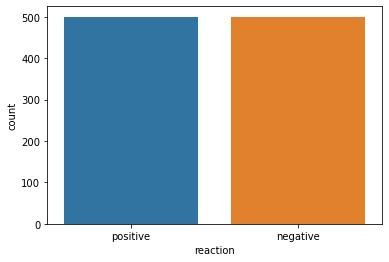

In [8]:
sns.countplot(df.reaction)
plt.show()

**Regex operations on the textual data**

Regex is one of the modules that python offers to analyze the test data for some regular string expressions. Using Regex the required characters can be filtered out from the textual data through suitable preprocessing and using the sub() module of Regex all the required patterns of the textual data can be fetched.

**Step - 1: Importing the required module**

In [9]:
import re

So once the Regex library is loaded into the working environment let us use this library to perform text analysis.

**Step-2: Using Regex to extract only the required text from the data**


In [10]:
text_doc = df.review.apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

In [11]:
text_doc.tail()

995    This was my first time and I can t wait until ...
996                              Great service and food 
997    I paid the bill but did not tip because I felt...
998    The one down note is the ventilation could use...
999                        I really enjoyed eating here 
Name: review, dtype: object

Here basically a lambda function is written to extract only alphabets in the textual data and filter out all other characters such as #,@, and many more which are most commonly used in textual data. So here only alphabets a-z and A-Z alphabets are extracted from the text data.

**Step-3: Observing the data before and after Regex operations**

So let us observe the data by using simple print statements to analyze the data before and after Regex operations.

In [12]:
print('Data before regex operation {}'.format(df['review'][4]))
print()
print('Data after regex operation {}'.format(text_doc[4]))

Data before regex operation Horrible - don't waste your time and money.

Data after regex operation Horrible   don t waste your time and money 


So here after the Regex operation, we can observe that the (-) character is removed from the original text data.

**Tokenization and lower case conversion**

Tokenization is the process of splitting the entire textual data into small pieces of text called tokens wherein each of the first columns of the textual data will be coveted to a list of tokens split with a comma (,) operator.

**Step - 1: Importing the required modules**

In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer

So here the required module for tokenization is made available in the working environment.

**Step - 2: Creating a tokenization instance**

In [14]:
tokenize=RegexpTokenizer('\w+')

Here in the tokenization instance being created (\w+) instance is being used to match one or more occurring words which may either be a-z or A-Z. So now using this instance let us see how to perform tokenization.

**Step - 3: Performing Tokenization**

In [15]:
tokens=text_doc.apply(lambda x:tokenize.tokenize(x))

A lambda function is used to perform tokenization on the entire textual data by calling the inbuilt function of RegexpTokenizer. Let us visualize the tokenized data using a print statement.

In [16]:
print(tokens[:5])

0               [Service, is, friendly, and, inviting]
1                        [Awesome, service, and, food]
2        [Waitress, was, a, little, slow, in, service]
3           [Come, hungry, leave, happy, and, stuffed]
4    [Horrible, don, t, waste, your, time, and, money]
Name: review, dtype: object


So this is how the entire text data is split into small pieces using the process of Tokenization. So now we have to convert all the tokens of the text data into lower case.

**Step-4: Lower case conversion of the tokenized data**

In [17]:
lower=[list(map(lambda x:x.lower(),l)) for l in tokens]

In [18]:
print(lower[0:5])

[['service', 'is', 'friendly', 'and', 'inviting'], ['awesome', 'service', 'and', 'food'], ['waitress', 'was', 'a', 'little', 'slow', 'in', 'service'], ['come', 'hungry', 'leave', 'happy', 'and', 'stuffed'], ['horrible', 'don', 't', 'waste', 'your', 'time', 'and', 'money']]


Here a lambda function is used to convert all the tokens in the dataset to lower case and the converted document can be verified through a print statement.

In [19]:
print('Original text document: {}'.format(text_doc[1]))
print()
print('Lower case converted document: {}'.format(lower[1]))

Original text document: Awesome service and food 

Lower case converted document: ['awesome', 'service', 'and', 'food']


So in this output generated we can observe the differences between the original textual data and the lower case converted data

**Stopword removal**

Stopwords are also termed as common words that would occur in textual data and it is very important to remove them in the process of text analysis or preprocessing as it would give more weightage to the actual text data utilized at that particular instance.

**Step - 1: Downloading the stopwords from the nltk package**



In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

So here the pretrained common stopwords of the nltk library is downloaded to the working environment.

**Step-2: Importing the required library for removing stopwords**

From the nltk package, the corpus library is utilized to retrieve the stopwords library.

In [21]:
from nltk.corpus import stopwords

**Step-3: Creating an instance for common stopwords in the English language**

In [22]:
stopwords=nltk.corpus.stopwords.words('english')

Now let us visualize the top 20 stopwords present in the nltk library through slicing operations.

In [23]:
stopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

Here in the output, the first 20 stopwords are obtained that are present in the nltk module.

**Step-4: Removing the word not present in the list of nltk common stopwords**

In [24]:
stopwords.remove('not')

The stopwords in the NLTK module are removed by using the simple remove() function of the list.

**Step-5:Handling the stopwords**

In [25]:
stop=[]
for line in lower:
 words=[]
 for word in line:
   if word not in stopwords:
     words.append(word)
 stop.append(words)


Here an empty list named stop is created to append the words that are not present in the standard list of the nltk module where the stopwords will be removed from the lower case converted data.

**Step-6: Analyzing the data before and after stopword removal**

Here is a simple print statement to analyze the textual data before and after removing the stopwords

In [26]:
print('Text column with stopword',lower[-1])
print()
print('Text column after removing stopword',stop[-1])

Text column with stopword ['i', 'really', 'enjoyed', 'eating', 'here']

Text column after removing stopword ['really', 'enjoyed', 'eating']


So here in the output, we can see that the common stop words of the English language like ‘i’ and ‘here’ are removed.

**5. Stemming the textual data**

Stemming is the process of just removing the last characters of each of the lower case converted characters using some standard NLTK packages. Here let us see how to use the LanCasterStemmer to perform the stemming operation.

**Step-1: Importing the stemming package from NLTK**

Here the Lancaster Stemmer library is being imported into the working environment.

In [27]:
from nltk.stem import LancasterStemmer

**Step - 2: Performing the stemming operation**

Here an empty list named stem is created and the stem function of LanCasterStemmer is used to chop off the last occurring character and the stem word will be appended to the empty list being created.

In [28]:
stem=[]
for line in stop:
 words=[]
 for word in line:
   words.append(LancasterStemmer().stem(word))
 stem.append(words)

So here only the stemmed words are appended to the stem list being created.

**Step-3: Analyzing the data before and after stemming**

Here the data before and after performing stemming is analyzed through a simple print statement.

In [29]:
print('Text column without stemming : {}'.format(lower[1]))
print()
print('Text column after stemming : {}'.format(stem[1]))

Text column without stemming : ['awesome', 'service', 'and', 'food']

Text column after stemming : ['awesom', 'serv', 'food']


Here in the output, we can see that after applying stemming to the lower case converted test data that words like service are converted to serve and awesome to awesom

*6. Lemmatization*

Lemmatization is one such process of text analytics where the context or the meaning of each of the lower case converted tokens is considered and the lemmatization process occurs. So let us see how to utilize the LanCasterStemmer of the NLTK module to implement lemmatization.

**Step-1: Importing the required library**

Here the required package of Lemmatization is imported into the working environment

In [30]:
from nltk.stem.wordnet import WordNetLemmatizer

**Step-2: Creating a lemmatization instance**

Here an instance for WordNetLemmatizer is created as shown below.

In [31]:
word_net_lem=WordNetLemmatizer()

**Step-3: Performing the lemmatization operation**

Here an empty list is created to append the lemmatized word by the lemmatization instance by using the inbuilt function of lemmatization named lemmatize as shown below.

In [32]:
lem=[]
for line in stop:
 words=[]
 for word in line:
   words.append(word_net_lem.lemmatize(word))
 lem.append(words)

Here each of the characters is lemmatized using the lemmatize function of Lemmatizer and the lemmatized words are appended to the lem list created.

**Step-4: Analyzing the lemmatized textual data**

Let us analyze the lower case converted data along with the lower case converted data and the lemmatized data for better interpretation between stemming and lemmatization.



In [33]:
print('Original data is : {}'.format(lower[-1]))
print()
print('Stemmed data is : {}'.format(stem[-1]))
print()
print('Lemmatized data is : {}'.format(lem[-1]))

Original data is : ['i', 'really', 'enjoyed', 'eating', 'here']

Stemmed data is : ['real', 'enjoy', 'eat']

Lemmatized data is : ['really', 'enjoyed', 'eating']


Here we can clearly see the difference between stemming and lemmatization and how lemmatization analyzes based on the context of the word.

Now let us use the lemmatized data and create a new column in our original dataset as shown below.

In [34]:
clean_text = []
for i in lem:
 clean_text.append(' '.join(i))
#Here an empty list is created to join each outcome of the lemmatization instance and later integrate with the data frame as shown below.
df['Cleaned_text']=clean_text
#Now let us visualize the top 5 entries of the data.
df.head(5)

,review,reaction,Cleaned_text
0,Service is friendly and inviting.,positive,service friendly inviting
1,Awesome service and food.,positive,awesome service food
2,Waitress was a little slow in service.,negative,waitress little slow service
3,"Come hungry, leave happy and stuffed!",positive,come hungry leave happy stuffed
4,Horrible - don't waste your time and money.,negative,horrible waste time money


Here we can see that the lemmatization output for each entry of the original data is appended under the column named Cleaned_text

**7. Visualizing the Cleaned textual data with WordClouds**

WordClouds are basically used to visualize the text data where the frequently occurring word will appear bigger in the visual and the words occurring for a fewer number of times will appear relatively small in the visual.

**Step -1: Importing the required modules**

Here the module is made available in the working environment



In [35]:
from wordcloud import WordCloud

**Step -2: Generating word cloud for the textual data**

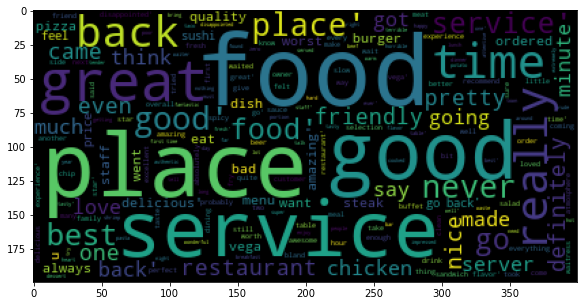

In [36]:
## Creating a word cloud instance
wc=WordCloud().generate(str(clean_text))
## Plotting the word cloud
plt.figure(figsize=(15,5))
plt.imshow(wc)
plt.show()

Here the Cleaned_text data column is used for WordCloud Visual and we can clearly see from the visual that words like the place, service, food, and good are used more frequently and words like best, service, and friendly are used very rarely.

Now let us try to obtain a wordcloud to visualize the most frequently occurring word in positive reviews where in the text document obtained after lemmatization is used to filter out the reviews.

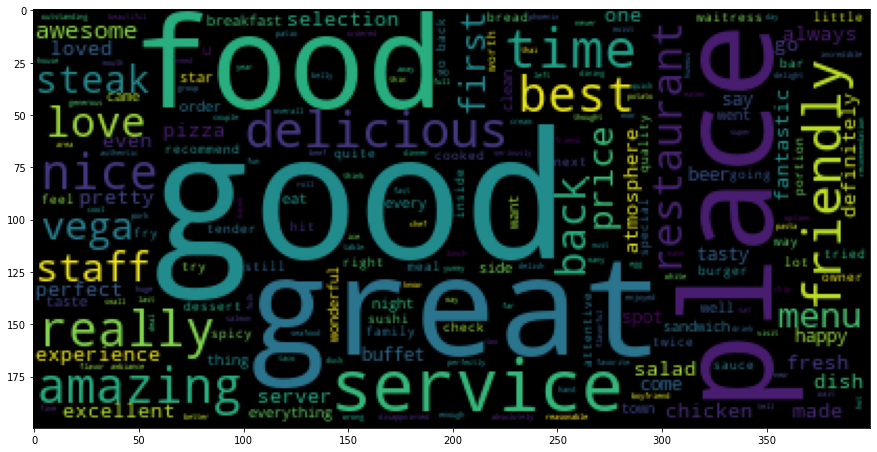

In [37]:
plt.figure(figsize = (15,15))
wc = WordCloud().generate(" ".join(df[df.reaction == 'positive'].Cleaned_text))
plt.imshow(wc)
plt.show()

This is a WordCloud obtained for a positive reaction from the data and in the words of the positive review like good, great, food, and service are used frequently and words like time, really, friendly and amazing are used only a few times.

In a similar way let us try to visualize the frequently occurring word in negative reviews where the lemmatized data will be filtered out for negative reviews as shown below.

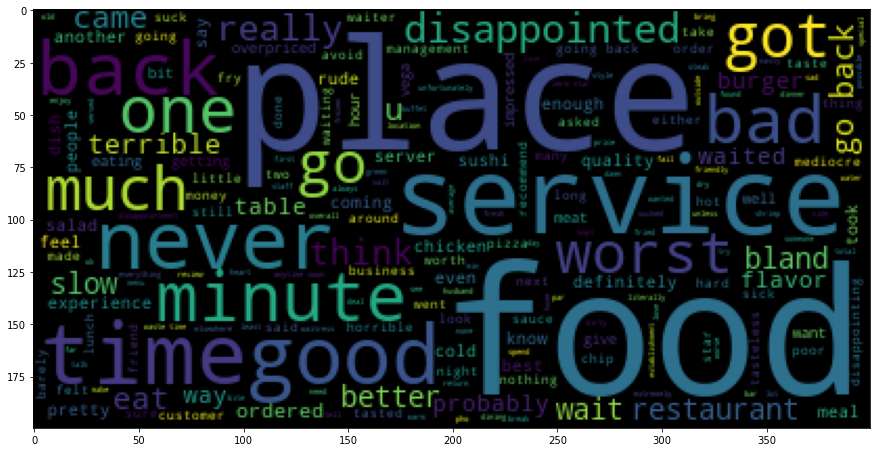

In [38]:
plt.figure(figsize = (15,15))
wc = WordCloud().generate(" ".join(df[df.reaction == 'negative'].Cleaned_text))
plt.imshow(wc)
plt.show()

This is a WordCloud obtained for negative reviews and we can see that words like food, never, service, and place are occurring frequently and words like worst, got, bad and much are occurring a very few times.

**8. CountVectorizer for feature extraction**

Countvectorizer is the process of converting textual data to numerical data, wherein it is a process similar to encoding in Machine Learning. Now let us see how to convert the textual data into numerical features using CountVectorizer.

**Step-1: Importing the required modules**



In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

**Step-2: Splitting the data into train and test**

Here the data is split into train and test by maintaining 20% of data for testing.

In [40]:
train_doc,test_doc=train_test_split(df['Cleaned_text'],test_size=0.2,random_state=42)

**Step-3: Creating a CountVectorizer instance**

Here a count vectorizer instance is created as shown below and it is fitted on the training document as shown below.



In [41]:
cv=CountVectorizer(min_df=2,max_df=5).fit(train_doc)

**Step-4: Analyzing the numerical features through a dataframe**

Here the feature names are analyzed in the form of a data frame to analyze how the features are transformed to numerical features.

In [42]:
x  = cv.fit_transform(df.Cleaned_text.values).toarray()
x  = pd.DataFrame(x,columns=cv.get_feature_names())
x

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acknowledged,actually,added,ago,almost,although,ambience,amount,anyone,anything,...,worker,world,worse,wow,wrap,wrong,year,yet,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this output, we can see that for each of the tokens of the data the encoded output by the CountVectorizer.

**9. TF-IDF**

TF-IDF abbreviates for Term Frequency and Inverse Document frequency and is a better parameter to evaluate when compared to CountVectorizer as it not only focuses on the frequency of words in the text document but also on the importance of the context of the word and converts the textual data to numerical data and this parameter are interlinked inversely.

So let us see how to implement the same

**Step-1: Importing the required modules**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Step-2: Creating a tf-idf instance**

 A TF-IDF instance is created by declaring the stopwords to English as shown below

In [44]:
tfidf_vec=TfidfVectorizer(stop_words="english")

**Step-3: Analyzing through a dataframe****** 

The feature names produced by the TF-IDF instance are manipulated to a data frame for easy interpretation as shown below.

In [45]:
tfidf_df = tfidf_vec.fit_transform(df.Cleaned_text.values)
tfidf_df= pd.DataFrame(tfidf_df.todense(),columns=tfidf_vec.get_feature_names())
tfidf_df

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledged,...,yeah,year,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In this output, we can see for each of the token's that how frequently certain characters occur over the entire corpus.

**Analyzing the common words in the textual data with grams**

Grams are nothing but the number of words that occur in each of the tokens. There are majorly 4 types of grams present in text analytics. They are:-

1.Unigram
2.Bigram
3.Trigram
4.Ngram
Analyzing a grams for common words

Unigrams are nothing but one word present per token and here the unigram is analyzed using a user-defined function and mentioning the gram factor as 1 in the function created below.

**Unigram text analysis**



In [46]:
def get_top_text_ngrams(corpus, n, g):
   vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
   bag_of_words = vec.transform(corpus)
   sum_words = bag_of_words.sum(axis=0)
   words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
   words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
   return words_freq[:n]

In [47]:
import plotly.express as px
common_uni = get_top_text_ngrams(df.Cleaned_text,20,1)
common_uni = dict(common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(common_uni.keys())
temp["Count"] = list(common_uni.values())
fig1 = px.bar(temp, x="Count", y="Common_words", title='Common Words in Unigram analysis', orientation='h',
            width=700, height=700,color='Common_words')
fig1.show()


In the unigram analysis, we can see that words like food occur more commonly and words like nice occur very less number of times.

**Bigram text analysis**

In a similar way, the common words in bigrams are observed by declaring the parameter as 2 in g and the same user-defined is used to obtain the plot using the plotly module.

In [48]:
common_big = get_top_text_ngrams(df.Cleaned_text,20,2)
common_big = dict(common_big)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(common_big.keys())
temp["Count"] = list(common_big.values())
fig2 = px.bar(temp, x="Count", y="Common_words", title='Common Words in Bigram analysis', orientation='h',
            width=700, height=700,color='Common_words')
fig2.show()

In the bigram analysis, we can see that words like go back occur more frequently and words like never ever are used less often.

**Trigram text analysis**

In a similar way, the common words in trigrams are observed by declaring the parameter as 3 in g and the same user-defined is used to obtain the plot using the plotly module.

In [49]:
common_tri = get_top_text_ngrams(df.Cleaned_text,20,3)
common_tri = dict(common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(common_tri.keys())
temp["Count"] = list(common_tri.values())
fig3 = px.bar(temp, x="Count", y="Common_words", title='Common Words in Trigram analysis', orientation='h',
            width=700, height=700,color='Common_words')
fig3.show()

In the trigram analysis, we can see that words like would not recommend occurring more frequently and words like would much rather are used less often.

So this is how different steps of text preproecssing and text analytics can be implemented in python.